# Decision Trees

Decision tree are a non parametric supervised leaning method used for [classification](https://www.geeksforgeeks.org/ml-classification-vs-regression/) and [regression](https://www.geeksforgeeks.org/ml-classification-vs-regression/). The goal to create a model that predict the value of target variable by learnign simple decision rules infered from the data features.

## Classification

DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.

As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X,sparse or dense,of size [n_samples,n_features] holding the traning samples, and an array Y of integer values, size [n_samples], holding the class lables for the training samples.

In [3]:
from sklearn import tree

In [4]:
X = [[0,0],[1,1]]
Y = [0,1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

After being fitted, the model can then be used to predict the class of samples

In [5]:
clf.predict([[2.,2.]])

array([1])

In [6]:
clf.predict_proba([[2.,2.]])

array([[0., 1.]])

DecisionTreeClassifier is capable of both binary (where the lables are[-1,1]) classification and multiclass (where the labels are [0,...,k-1]) classification.

**Using the iris dataset, I can construst a tree**

In [13]:
from sklearn.datasets import load_iris

In [22]:
iris = load_iris()
X , y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

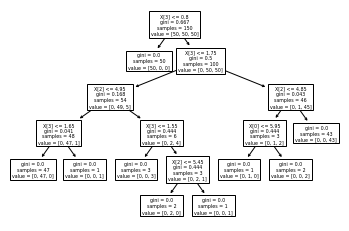

In [23]:
tree.plot_tree(clf)

In [24]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

The export_graphviz export also supports a varitey of aesthetic options,including coloring nodes by their (or values for regression) and using explits variable and class names.

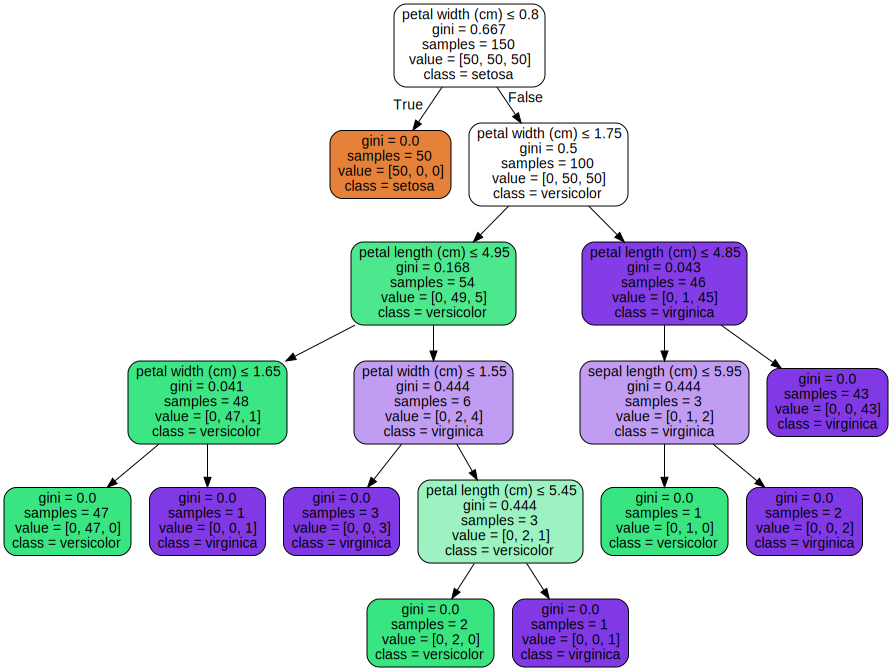

In [25]:

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [31]:
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier

In [32]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data,iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



## Regression

In [40]:
print(__doc__)
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

Automatically created module for IPython interactive environment


In [41]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [42]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [43]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

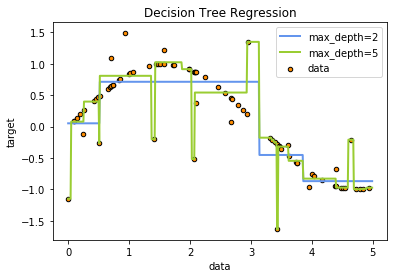

In [44]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Multi-output Decision Tree Regression

The decision tree is used to predict simultaneously the noisy x and y obervations of a circle given a single underlying feature. As a result, it learns local linear regression approximating the circle.

We can see that if the maximum depth of the tree(controlled by the max_depth parameter) is set too high, the decision trees
learn to fine deltails of the training data and learn from the noise, i.e. they overfit.

In [3]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

Automatically created module for IPython interactive environment


In [7]:
#create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) -100,axis=0)
y = np.array([np.pi * np.sin(X).ravel(),np.pi * np.cos(X).ravel()]).T
y[::5,:] += (0.5 - rng.rand(20,2))

#fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X,y)
regr_2.fit(X,y)
regr_3.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [15]:
#predict
X_test = np.arange(-100.0, 100.0, 0.01)[:,np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)
X_test
y_1
y_2
y_3


array([[ 1.82569761,  2.64490159],
       [ 1.82569761,  2.64490159],
       [ 1.82569761,  2.64490159],
       ...,
       [-1.84319053, -0.55258289],
       [-1.84319053, -0.55258289],
       [-1.84319053, -0.55258289]])

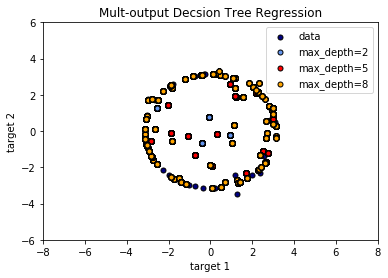

In [22]:
#plot the results
plt.figure()
s = 25
plt.scatter(y[:,0], y[:,1],c="navy", s=s,edgecolor="black", label = "data")
plt.scatter(y_1[:,0], y_1[:,1],c="cornflowerblue", s=s,edgecolor="black", label = "max_depth=2")
plt.scatter(y_2[:,0], y_2[:,1],c="red", s=s,edgecolor="black", label = "max_depth=5")
plt.scatter(y_3[:,0], y_3[:,1],c="orange", s=s,edgecolor="black", label = "max_depth=8")

plt.xlim([-8,8])
plt.ylim([-6,6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Mult-output Decsion Tree Regression")
plt.legend(loc="best")
plt.show()
